# Tasca 7: Transformació Registre Log amb Regular Expressions

In [1]:
# Càrrega de llibreries i métodes
import pandas as pd
import numpy as np
import re
import datetime as dt
from device_detector import SoftwareDetector
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Nivell 1
### - Exercici 1
__Normalitza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".__

In [2]:
# Càrrega de la base de dades
df_logs = pd.read_csv('Web_access_log-akumenius.com.txt', sep='delimiter', header=None, engine='python')
df_logs.head()

,0
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...


In [3]:
# Es crea una copia de la base de dades
df_copy = df_logs.copy()

In [4]:
# Es crea un nou dataframe buit que contindrà les dades separades en columnes
df_logs_final = pd.DataFrame()

<span style='color:blue;font-size:18px'><b> Variable 1: Host </b></span>

In [5]:
# Es crea la variable (Direccio), que indica el nom del lloc on s'estableix la conexió
# Regex: cometes + (un o més caràcters) + espai + un o més digits + punt
df_logs_final['Host'] = df_copy.iloc[:,0].apply(lambda x: re.findall(r'^(.*?)\s.*', str(x)))
df_logs_final.head()

,Host
0,[localhost]
1,[localhost]
2,[localhost]
3,[localhost]
4,[localhost]


<span style='color:blue;font-size:18px'><b> Variable 2: IP </b></span>

In [6]:
# Es crea la variable (IP), que indica la direcció IP des d'on es realitza la petició
# Regex: (Un o més digits + punt + un o més digits + . + qualsevol caràcter fins) un espai + guió + espai + guió
df_logs_final['IP'] = df_copy.iloc[:,0].apply(lambda x: re.findall(r'(\d+\.\d+\..*)\s-\s-', str(x)))
df_logs_final.head()

,Host,IP
0,[localhost],[127.0.0.1]
1,[localhost],[127.0.0.1]
2,[localhost],[127.0.0.1]
3,[localhost],[127.0.0.1]
4,[localhost],[127.0.0.1]


<span style='color:blue;font-size:18px'><b> Variable 3: Moment_conexio </b></span>

In [7]:
# Es crea la variable (Moment_conexio), que indica la data i l'hora en que el servidor finalitza el porcés de petició
# Regex: Espai + (Qualsevol caracter entre claudàtors), exclosos + espai + cometes
df_logs_final['Moment_conexio'] = df_copy.iloc[:,0].apply(lambda x: re.findall(r'\s\[(.+)\]\s"', str(x)))
df_logs_final.head()

,Host,IP,Moment_conexio
0,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100]
1,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100]
2,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100]
3,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100]
4,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100]


<span style='color:blue;font-size:18px'><b> Variable 4: Peticio </b></span>

In [8]:
# Es crea la variable (Peticio), que indica la línea de petició del client
# Regex: (Qualsevol caracter entre cometes dobles), exclosos + espai + un o més digits
df_logs_final['Peticio'] = df_copy.iloc[:,0].apply(lambda x: re.findall(r'"(.+)"\s\d+', str(x)))
df_logs_final.head()

,Host,IP,Moment_conexio,Peticio
0,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0]
1,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0]
2,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0]
3,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0]
4,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0]


<span style='color:blue;font-size:18px'><b> Variable 5: Status </b></span>

In [9]:
# Es crea la variable (Status), que indica el codi d'estatus que el server envia pel client
# Regex: cometws + espai + (3 digits) + espai 
df_logs_final['Status'] = df_copy.iloc[:,0].apply(lambda x: re.findall(r'"\s(\d\d\d)\s', str(x)))
df_logs_final.head()

,Host,IP,Moment_conexio,Peticio,Status
0,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200]
1,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200]
2,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200]
3,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200]
4,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200]


<span style='color:blue;font-size:18px'><b> Variable 6: Size </b></span>

In [10]:
# Es crea la variable (Size), que indica la grandària de l'objecte retornat al client. "-" indica que no es retorna valor
# Regex: qualsevol digit + espai + (guió o un o més digits) + espai + cometes
df_logs_final['Size'] = df_copy.iloc[:,0].apply(lambda x: re.findall(r'\d\s(-|\d+)\s"', str(x)))
df_logs_final.head()

,Host,IP,Moment_conexio,Peticio,Status,Size
0,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-]
1,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-]
2,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-]
3,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-]
4,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-]


<span style='color:blue;font-size:18px'><b> Variable 7: Referer </b></span>

In [11]:
# Es crea la variable (Referer), que indica el lloc des d'on el client informa haber sigut referit
# Regex: Qualsevol caràcter que no sigui ] o " + espai + cometes + (un o més caràcters) + cometes + espai + 
# + cometes + un o més caràcters + cometes, exclosos
df_logs_final['Referer'] = df_copy.iloc[:,0].apply(lambda x: re.findall(r'[^]"]\s"(.+)"\s".+"', str(x)))
df_logs_final.head()

,Host,IP,Moment_conexio,Peticio,Status,Size,Referer
0,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-],[-]
1,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-],[-]
2,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-],[-]
3,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-],[-]
4,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-],[-]


<span style='color:blue;font-size:18px'><b> Variable 8: Dispositiu </b></span>

In [12]:
# Es crea la variable (Navegador), que indica quin navegador web utilitza l'usuari
# Regex: cometes + espai+ (Qualsevol caracter entre cometes), exclosos + espai + VLOG=-
df_logs_final['Dispositiu'] = df_copy.iloc[:,0].apply(lambda x: re.findall(r'"\s"(.+)"\sVLOG=-', str(x)))
df_logs_final.head()

,Host,IP,Moment_conexio,Peticio,Status,Size,Referer,Dispositiu
0,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-],[-],[Apache (internal dummy connection)]
1,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-],[-],[Apache (internal dummy connection)]
2,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-],[-],[Apache (internal dummy connection)]
3,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-],[-],[Apache (internal dummy connection)]
4,[localhost],[127.0.0.1],[23/Feb/2014:03:10:31 +0100],[OPTIONS * HTTP/1.0],[200],[-],[-],[Apache (internal dummy connection)]


## Nivell 2
### - Exercici 2
__Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.__

In [13]:
# Es crea una copia de l'anterior dataframe
df_prep = df_logs_final.copy()

<span style='color:blue;font-size:18px'><b> De llista a string </b></span>

In [14]:
# Com que cada valor es troba dins d'una llista, es crea una funció que, donat un dataframe y el número de les columnes,
# extregui el valor de la llista per a cada variable
def no_llista(data,num_col):
    for i in num_col:
        data.iloc[:,i] = [''.join(x) for x in data.iloc[:,i]]
    return data

In [15]:
# S'aplica la funció
data_final = no_llista(df_prep,range(8))
data_final.head()

,Host,IP,Moment_conexio,Peticio,Status,Size,Referer,Dispositiu
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)


<span style='color:blue;font-size:18px'><b> Moment_conexio: de string a datetime </b></span>

In [16]:
# La variable Moment_conexio és un string i es vol convertir-lo en format datetime
data_final['Moment_conexio'] = pd.to_datetime(data_final['Moment_conexio'], format='%d/%b/%Y:%H:%M:%S %z')
data_final.head()

,Host,IP,Moment_conexio,Peticio,Status,Size,Referer,Dispositiu
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection)


<span style='color:blue;font-size:18px'><b> Creació de les variables Data i Hora </b></span>

In [17]:
data_final['Dia'] = data_final['Moment_conexio'].dt.strftime('%d/%b/%Y')
data_final['Dia'] = data_final['Dia'].apply(lambda x: dt.datetime.strptime(x,'%d/%b/%Y'))
data_final['Hora'] = data_final['Moment_conexio'].dt.time
data_final.drop(columns=['Moment_conexio'],inplace=True)
data_final.head()

,Host,IP,Peticio,Status,Size,Referer,Dispositiu,Dia,Hora
0,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),2014-02-23,03:10:31
1,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),2014-02-23,03:10:31
2,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),2014-02-23,03:10:31
3,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),2014-02-23,03:10:31
4,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),2014-02-23,03:10:31


<span style='color:blue;font-size:18px'><b> Creació de de les variables client_name, client_type, client_version, os_name, os_version i device_type </b></span>

In [18]:
# Es crea la variable Device, que conté diversos tipus de dades de la variable Dispositiu:
data_final['Device'] = data_final['Dispositiu'].apply(lambda x: SoftwareDetector(x).parse())

In [19]:
# Es creen les noves variables extraïent la informació de la variable Device
data_final['client_name'] = data_final['Device'].apply(lambda x: x.client_name())
data_final['client_type'] = data_final['Device'].apply(lambda x: x.client_type())
data_final['client_version'] = data_final['Device'].apply(lambda x: x.client_version())
data_final['os_name'] = data_final['Device'].apply(lambda x: x.os_name())
data_final['os_version'] = data_final['Device'].apply(lambda x: x.os_version())
data_final['device_type'] = data_final['Device'].apply(lambda x: x.device_type())

In [20]:
# S'eliminen les columnes Dispositiu i Device
data_final.drop(columns=['Dispositiu','Device'],inplace=True)

In [21]:
# Taula final
data_final.head()

,Host,IP,Peticio,Status,Size,Referer,Dia,Hora,client_name,client_type,client_version,os_name,os_version,device_type
0,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,2014-02-23,03:10:31,Apache (internal dummy connection),generic,None,,,
1,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,2014-02-23,03:10:31,Apache (internal dummy connection),generic,None,,,
2,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,2014-02-23,03:10:31,Apache (internal dummy connection),generic,None,,,
3,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,2014-02-23,03:10:31,Apache (internal dummy connection),generic,None,,,
4,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,-,2014-02-23,03:10:31,Apache (internal dummy connection),generic,None,,,


### - Exercici 3
__Geolocalitza les IP's__

## Nivell 3
### - Exercici 4
__Mostra la teva creativitat, fes un pas més enllà amb l'anàlisi anterior.__

<span style='color:blue;font-size:18px'><b> Anàlisi Descriptiu </b></span>

In [22]:
data_final.describe(include='object')

,Host,IP,Peticio,Status,Size,Referer,Hora,client_name,client_type,client_version,os_name,os_version,device_type
count,261873,261873,261873,261873,261873,261873,261873,261873,261873,247549,261873,261873,261873
unique,5,2922,66764,12,15548,2507,66635,100,7,156,14,69,4
top,www.akumenius.com,66.249.76.216,OPTIONS * HTTP/1.0,200,-,-,16:19:28,Googlebot,browser,2.1,,,
freq,232300,46382,13892,226382,42335,99547,99,50914,163070,50919,96193,100665,140052


<span style='color:blue;font-size:18px'><b> Gràfics univariants </b></span>

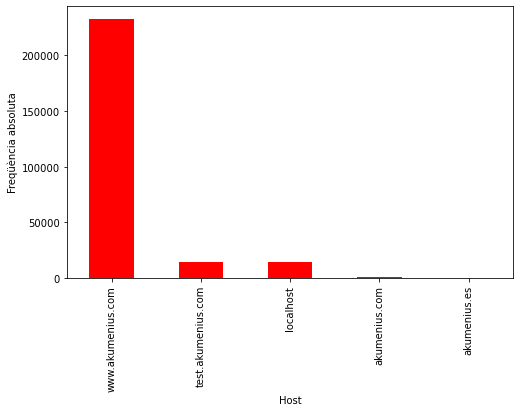

In [23]:
# Gràfic de barres: Host
data_H = data_final[['Host','IP']].groupby(['Host']).count().sort_values(by='IP',ascending=False)
data_H = data_H.rename(columns={'IP' : 'Freq_abs'})
data_H.plot.bar(y='Freq_abs', color='red', ylabel='Freqüència absoluta', legend=None, figsize=(8,5))
plt.show()

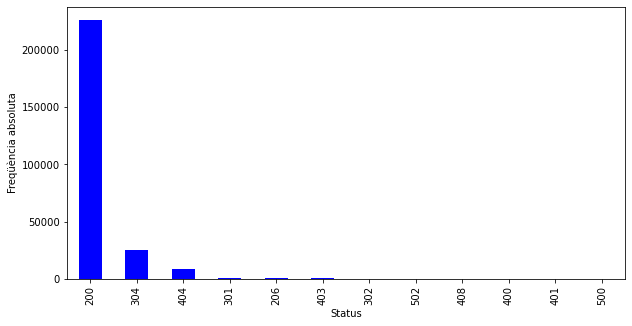

In [24]:
# Gràfic de barres: Status
data_H = data_final[['Status','IP']].groupby(['Status']).count().sort_values(by='IP',ascending=False)
data_H = data_H.rename(columns={'IP' : 'Freq_abs'})
data_H.plot.bar(y='Freq_abs', color='blue', ylabel='Freqüència absoluta', legend=None, figsize=(10,5))
plt.show()

<span style='color:blue'> En la gran majoria de registres la petició s'ha produït correctament (Status = 200) </span>

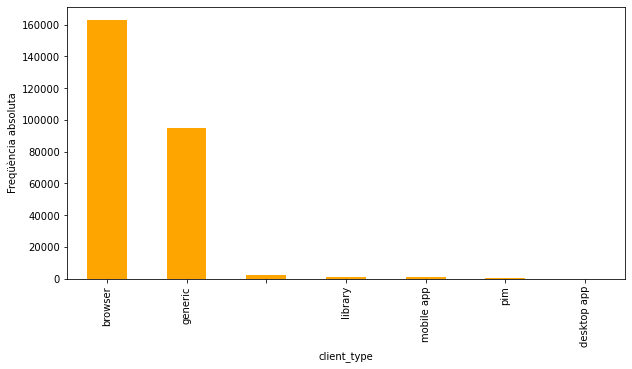

In [25]:
# Gràfic de barres: client_type
data_H = data_final[['client_type','IP']].groupby(['client_type']).count().sort_values(by='IP',ascending=False)
data_H = data_H.rename(columns={'IP' : 'Freq_abs'})
data_H.plot.bar(y='Freq_abs', color='orange', ylabel='Freqüència absoluta', legend=None, figsize=(10,5))
plt.show()

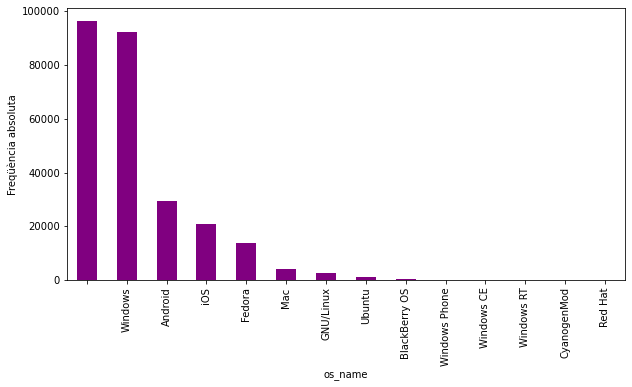

In [26]:
# Gràfic de barres: os_name
data_H = data_final[['os_name','IP']].groupby(['os_name']).count().sort_values(by='IP',ascending=False)
data_H = data_H.rename(columns={'IP' : 'Freq_abs'})
data_H.plot.bar(y='Freq_abs', color='purple', ylabel='Freqüència absoluta', legend=None, figsize=(10,5))
plt.show()

<span style='color:blue'> El Sistema Operatiu més utilitzat per a realitzar les peticions és Windows </span>

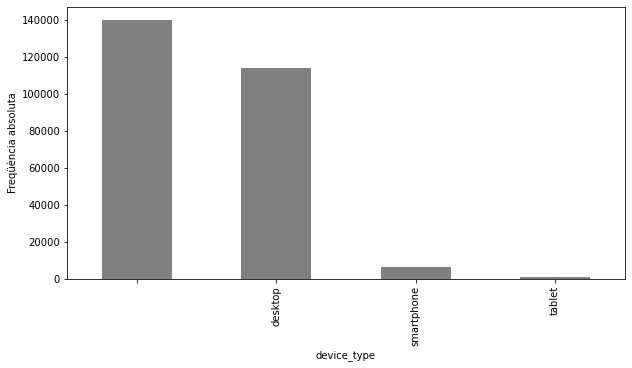

In [27]:
# Gràfic de barres: device_type
data_H = data_final[['device_type','IP']].groupby(['device_type']).count().sort_values(by='IP',ascending=False)
data_H = data_H.rename(columns={'IP' : 'Freq_abs'})
data_H.plot.bar(y='Freq_abs', color='gray', ylabel='Freqüència absoluta', legend=None, figsize=(10,5))
plt.show()

<span style='color:blue'> El dispositiu més utilitzat per a realitzar les peticions és l'ordinador </span>

<span style='color:blue;font-size:18px'><b> Gràfics de sèries temporals </b></span>

In [28]:
# Status
# Es crea una taula amb el compteig de registres pero día i status
data_ST = data_final.loc[:,['Status','Dia','IP']].groupby(['Dia','Status']).count()
data_ST.rename(columns={'IP' : 'Ocurrencies'},inplace=True)
data_ST.head()

Ocurrencies
Dia        Status             
2014-02-23 200           34061
           206               9
           301              80
           304             330
           400               1

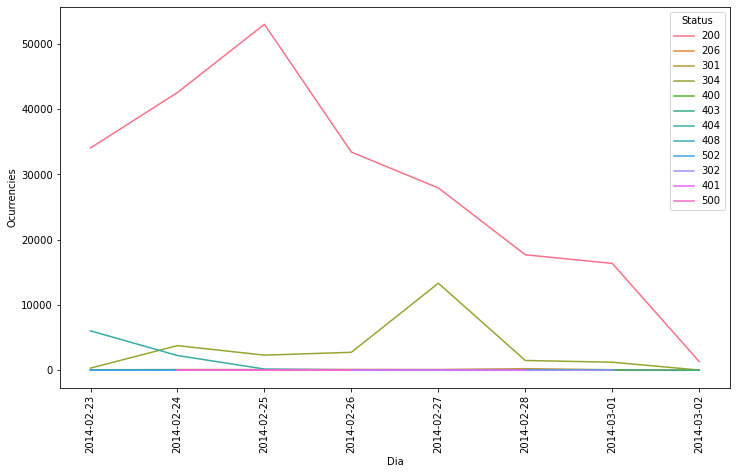

In [29]:
#Es construeix el plot
plt.figure(figsize=(12,7))
sns.lineplot(x='Dia',y='Ocurrencies',data=data_ST,hue='Status')
plt.xticks(rotation=90)
plt.show()

<span style='color:blue'> El dia 27 de febrer de 2014, quasi un terç del registres tenien Status 304 (problema de comunicació entre navegador i servidor). </span>

<span style='color:blue;font-size:18px'><b> Exportació de la base de dades </b></span>

In [35]:
# Es crea una copia
data_export = data_final.copy()

In [36]:
# Es substitueixen els valors en blanc per nulls
data_export.replace('','null',inplace=True)

In [37]:
# S'exporta a csv
data_export.to_csv('arxiu_logs.csv',index=False)